In [5]:
from math import *
import numpy as np
import scipy.integrate as integrate
import matplotlib, math
from matplotlib import pyplot as plt

In [36]:
# Hawkes process: exponential kernel version, for a list of events 
def intensity_exp(event_times,history):
    mu, alpha, beta = .1, 1, .5
    intensities = []
    for prev_t in history:
        prev_t_int = mu
        for t in event_times:
            prev_t_int += alpha*np.exp(-beta*(prev_t-t)) if prev_t > t else 0
        intensities.append(prev_t_int)
    return intensities
                       

# Hawkes process: power law kernel version, for a list of events 
def intensity_plaw(event_times, history):
    mu, alpha, beta, eta = .1, 1, .5, .5
    intensities = []
    for prev_t in history:
        prev_t_int = mu
        for t in event_times:
            prev_t_int += alpha/((prev_t-t + beta)**(eta+1)) if prev_t > t else 0
        intensities.append(prev_t_int)
    return intensities
    

    
# for a single event 
def simulate_exp(event, mu, alpha, beta):
    #mu, alpha, beta = .1, 1, .5
    return mu + alpha*np.exp(-beta*(event))


def simulate_plaw(event, mu, alpha, beta, eta):
    #mu, alpha, beta, eta = .1, 1, .5, .5
    return mu + alpha/((event + beta)**(eta+1)) 
    


In [4]:
# https://stackoverflow.com/questions/24785518/how-to-compute-residuals-of-a-point-process-in-python

timesOfInterest = np.linspace(0.0, 10.0, 100)
EventTimes = np.array([0.7, 1.2, 2.0, 3.8, 7.1, 8.2, 8.9, 9.0])
conditionalIntensities = intensity_exp(EventTimes, timesOfInterest)

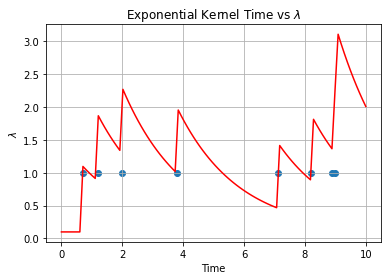

In [5]:
timesOfInterest = np.linspace(0.0, 10.0, 100)
EventTimes = np.array([0.7, 1.2, 2.0, 3.8, 7.1, 8.2, 8.9, 9.0])

fig, ax = plt.subplots()
ax.set_title("Exponential Kernel Time vs $\lambda$")
ax.grid(True)
ax.set_xlabel("Time")
ax.set_ylabel("$\lambda$")
ax.scatter(EventTimes,np.ones(len(EventTimes))) # where events happened 
ax.plot(timesOfInterest, conditionalIntensities, color='red')

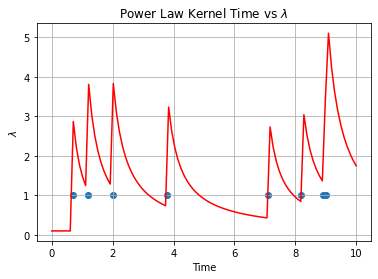

In [6]:
conditionalIntensities = intensity_plaw(EventTimes, timesOfInterest)

fig, ax = plt.subplots()
ax.set_title("Power Law Kernel Time vs $\lambda$")
ax.grid(True)
ax.set_xlabel("Time")
ax.set_ylabel("$\lambda$")
ax.scatter(EventTimes,np.ones(len(EventTimes))) # where events happened 
ax.plot(timesOfInterest, conditionalIntensities, color='red')

In [11]:
# computes the expected number of direct offspring spawned by a single event
def integrand(x, event_time, prev_time):
    return single_intensity_exp(event_time, prev_time) * x
    
def branching(event_time, prev_time):
    return integrate.quad(integrand, 0, np.inf, args=(event_time, prev_time))


In [37]:
def thinning_exp(N, mu, alpha, beta):
    T = 0
    i = 1
    current_T = T
    accepted = []
    while i < N: # len of events or history?
        intensity_t = simulate_exp(0, mu, alpha, beta)
        u = np.random.uniform(0,1)
        t = -math.log(u)/intensity_t
        T = T + t
        s = np.random.uniform(0,1)
        if s <= simulate_exp(T, mu, alpha, beta)/intensity_t:
            accepted.append(s) 
            current_T = T
            i += 1 
    return accepted 

In [38]:
# subsequent events: 
thinning_exp(100,.1, 1, .5)

[0.24418553649949915,
 0.018380544864268433,
 0.08440095914893253,
 0.035559106393049156,
 0.06658807977180647,
 0.060025441175563854,
 0.055960257667802216,
 0.027177915080876303,
 0.023400911583020045,
 0.022354227897627754,
 0.03875652258633622,
 0.06752757745694282,
 0.06847878992720968,
 0.059762969139193434,
 0.08330981197749643,
 0.06154859754560271,
 0.0453582372249991,
 0.015531896725451078,
 0.07378585144206995,
 0.06293965120090772,
 0.0798772012271246,
 0.014652214678252395,
 0.08139025955333556,
 0.006111620180827115,
 0.019299164113255385,
 0.044458049579427006,
 0.01140111524487375,
 0.08707022560344613,
 0.02748771201392919,
 0.05748259544697232,
 0.026722057030978297,
 0.07220329417755955,
 0.007780697670711545,
 0.019813958684085753,
 0.0077151351447678485,
 0.08240555950371997,
 0.09019090292860032,
 0.044418233746765234,
 0.08425159102180457,
 0.05006620871710299,
 0.06694643561938263,
 0.051379786659291216,
 0.058371784874436616,
 0.07709042725450699,
 0.0778748741